# Final Project - Classification of positive and negative women for PCOS by body mertics and gut bacteria

## Imports

In [1]:
import numpy as np
## Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno
import plotly.graph_objects as go
## Pandas Dataframe Library
import pandas as pd
import plotly.express as px
## Numpy Library
## Train and Test Split
from sklearn.model_selection import train_test_split
## Evaluation Matrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
## ML 
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
## Kfold and ROC
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, auc
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn import tree
from tqdm import tqdm
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import FeatureUnion
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.covariance import MinCovDet
import rfpimp
from xgboost import XGBClassifier
import random
from sklearn.pipeline import Pipeline
#statistic research libraries
from scipy.stats import pearsonr
import itertools
import researchpy as rp
import scipy.stats as stats
from scipy.stats import loguniform 
from sklearn.base import TransformerMixin
from scipy.sparse import csr_matrix
from scipy.sparse import hstack as sparse_hstack
from main import numeric_Transformer, standardscaler2
import warnings
warnings.filterwarnings('ignore') 

## Reading data

In [2]:
df=pd.read_csv('training_set_polycystic_ovary_syndrome_prediction_v0.csv') #reading the file of data

In [3]:
df.head() 

,index,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_ruminococcaceae|g_subdoligranulum|s_subdoligranulum_unclassified,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_ruminococcaceae|g_subdoligranulum,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales,k_bacteria|p_firmicutes|c_clostridia,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_ruminococcaceae,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_eubacteriaceae|g_eubacterium|s_eubacterium_eligens,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_eubacteriaceae|g_eubacterium|s_eubacterium_eligens|t_gcf_000146185,k_bacteria|p_firmicutes,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_lachnospiraceae|g_coprococcus,...,UniRef90_X0XU03,UniRef90_X1AFB9,UniRef90_X8C8Q1,shannon_genefamilies_cpm,simpson_genefamilies_cpm,richness_genefamilies_cpm,even_genefamilies_cpm,y,bmi,hba1c
0,0,5.82831,5.82831,38.45157,38.45157,16.86270,1.34872,1.34872,38.47642,0.35360,...,0.814647,0.009367,0.099140,7.814428,1184.308319,5187,0.913550,False,21.230572,4.9
1,1,16.03891,16.03891,45.31844,45.31844,25.15851,0.88815,0.88815,46.54746,0.27536,...,0.333630,0.035206,0.240067,7.898944,970.927541,6198,0.904599,False,25.390625,5.7
2,2,0.46554,0.46554,2.89525,2.89525,0.65340,0.00556,0.00556,3.39977,0.13487,...,0.000000,0.000000,0.000000,5.006568,65.289281,422,0.828216,False,22.308150,5.2
3,3,1.84665,1.84665,12.41282,12.41282,8.54346,0.11396,0.11396,13.05233,0.13934,...,0.000000,0.000000,0.000000,5.712678,74.532708,948,0.833438,False,36.506220,5.7
4,4,6.51542,6.51542,23.72625,23.72625,11.58181,0.00000,0.00000,23.99806,0.22066,...,0.136539,0.030094,0.061401,6.782541,314.382376,4607,0.804063,False,25.390625,NaN


#### Metadata

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3356 entries, 0 to 3355
Columns: 13234 entries, index to hba1c
dtypes: bool(1), float64(13228), int64(5)
memory usage: 338.8 MB


In [5]:
print("Number of rows:", df.shape[0]) #the 0 axis is the rows
print("Number of columns:", df.shape[1]) #the 1 axis is the columns
print("Total cells:", df.size)
intial_n_columns = df.shape[1]

Number of rows: 3356
Number of columns: 13234
Total cells: 44413304


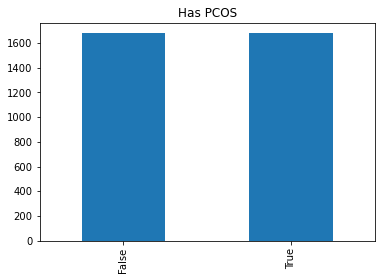

In [6]:
df['y'].value_counts().plot(kind='bar', title="Has PCOS")
plt.show()

In [7]:
df.columns

Index(['index',
       'k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_ruminococcaceae|g_subdoligranulum|s_subdoligranulum_unclassified',
       'k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_ruminococcaceae|g_subdoligranulum',
       'k_bacteria|p_firmicutes|c_clostridia|o_clostridiales',
       'k_bacteria|p_firmicutes|c_clostridia',
       'k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_ruminococcaceae',
       'k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_eubacteriaceae|g_eubacterium|s_eubacterium_eligens',
       'k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_eubacteriaceae|g_eubacterium|s_eubacterium_eligens|t_gcf_000146185',
       'k_bacteria|p_firmicutes',
       'k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_lachnospiraceae|g_coprococcus',
       ...
       'UniRef90_X0XU03', 'UniRef90_X1AFB9', 'UniRef90_X8C8Q1',
       'shannon_genefamilies_cpm', 'simpson_genefamilies_cpm',
       'richness_genefamilies_cpm', 'even_genefam

In [8]:
bacterias = []
genes = []
pwys = []
others = []
viruses = []

for col in df.columns:
    if 'index'==  col or "bmi" == col or  'hba1c'== col or 'y'== col:
        others.append(col)
    elif "UniRef" in col:
        genes.append(col)
    elif "PWY" in col or "path" in col or "SIS" in col or "cycle" in col:
        pwys.append(col)
    elif "virus" in col:
        viruses.append(col)
    else:
        bacterias.append(col)
print("There are", len(bacterias) ,"columns that describe bacterias\n")
print("There are", len(genes) ,"columns that describe bacreria's genes\n")
print("There are", len(pwys) ,"columns that describe pathways\n")
print("There are", len(viruses) ,"columns that describe viruses\n")
print("There are", len(others) ,"columns that describe other features\n")


There are 6140 columns that describe bacterias

There are 6500 columns that describe bacreria's genes

There are 427 columns that describe pathways

There are 163 columns that describe viruses

There are 4 columns that describe other features



In [9]:
df.describe() 

,index,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_ruminococcaceae|g_subdoligranulum|s_subdoligranulum_unclassified,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_ruminococcaceae|g_subdoligranulum,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales,k_bacteria|p_firmicutes|c_clostridia,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_ruminococcaceae,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_eubacteriaceae|g_eubacterium|s_eubacterium_eligens,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_eubacteriaceae|g_eubacterium|s_eubacterium_eligens|t_gcf_000146185,k_bacteria|p_firmicutes,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_lachnospiraceae|g_coprococcus,...,UniRef90_X0UXD8,UniRef90_X0XU03,UniRef90_X1AFB9,UniRef90_X8C8Q1,shannon_genefamilies_cpm,simpson_genefamilies_cpm,richness_genefamilies_cpm,even_genefamilies_cpm,bmi,hba1c
count,3356.000000,3355.000000,3355.000000,3355.000000,3355.000000,3355.000000,3355.000000,3355.000000,3355.000000,3355.000000,...,3356.000000,3356.000000,3356.000000,3356.000000,3356.000000,3356.000000,3356.000000,3356.000000,3353.000000,2092.000000
mean,1677.500000,6.528121,6.541368,29.623440,29.623440,16.094587,0.905931,0.905931,31.584357,1.022085,...,0.160181,0.155077,0.026246,0.078331,6.574714,331.997771,2827.180572,0.841668,28.102247,5.538996
std,968.938079,6.880025,6.888819,14.761486,14.761486,9.762353,1.397453,1.397453,14.945380,1.575528,...,0.287098,0.291628,0.098633,0.156955,0.795727,282.724719,1452.562518,0.045149,6.236922,1.077537
min,0.000000,0.000000,0.000000,0.003350,0.003350,0.000000,0.000000,0.000000,0.093830,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.019079,8.027485,59.000000,0.537512,15.916955,3.000000
25%,838.750000,1.606475,1.608260,18.663155,18.663155,8.766330,0.077835,0.077835,20.455670,0.160785,...,0.000000,0.000000,0.000000,0.000000,6.012359,119.154072,1693.000000,0.809284,23.545706,5.000000
50%,1677.500000,4.168500,4.190860,28.244380,28.244380,14.566320,0.429850,0.429850,30.117980,0.434300,...,0.065117,0.000000,0.000000,0.000000,6.688678,235.650193,2684.000000,0.846290,26.998299,5.300000
75%,2516.250000,9.170885,9.184290,38.963175,38.963175,21.866980,1.154855,1.154855,41.068020,1.242140,...,0.218258,0.257551,0.016626,0.101308,7.170887,461.457828,3748.000000,0.877404,31.250000,5.700000
max,3355.000000,60.322680,60.322680,87.581580,87.581580,67.479560,19.499550,19.499550,90.323150,21.712380,...,3.548620,4.099080,1.607570,2.458080,8.169025,2104.306959,6373.000000,0.953336,74.360500,20.000000


### Visualizations

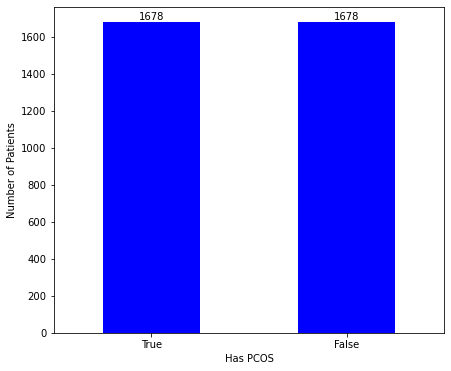

In [10]:
gender = df['y'].value_counts()
plt.figure(figsize=(7, 6))
ax = gender.plot(kind='bar', rot=0, color="b")
ax.set_xlabel('Has PCOS')
ax.set_ylabel('Number of Patients')
ax.set_xticklabels(('True', 'False'))

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

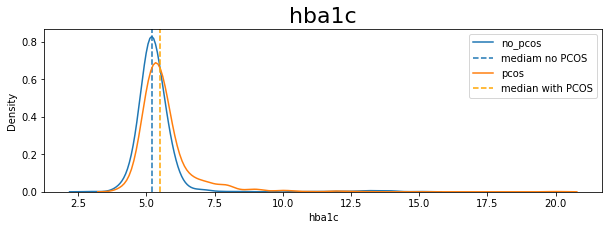

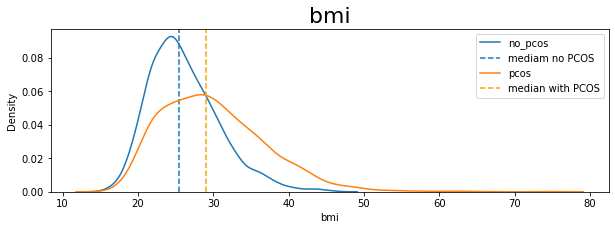

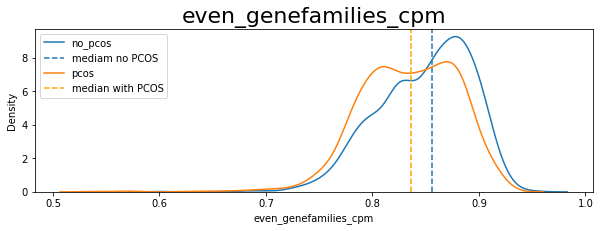

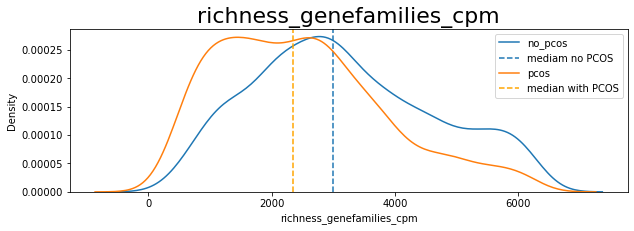

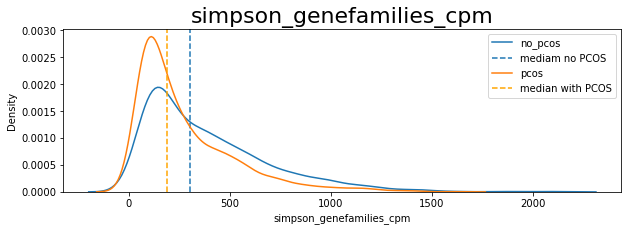

In [11]:
# Calculate target - for visualization purposes. Is also used calculated during preprocessing
y = df['y'].copy()


# KDE plots for continuous variables, histograms for discrete

features_to_plot = df.columns[::-1][:6]

# Density Plot w.r.t label
def density_plots(df, features):
  '''
  For each feature in features: returns a histogram/density plot (if discrete/continuous, respectively) given the data in df
  Parameters
  ----------
  None
  Returns
  ----------
  Plots
      histogram/density plots for each feature in features
  '''
  for col in features:
    if col != 'y':
      plt.figure(figsize=(10, 3))
      # continuous features        
      sns.kdeplot(df.loc[df.y == False, col], label='no_pcos')
      plt.axvline(df.loc[df.y == False, col].median(), linestyle = '--', label="mediam no PCOS")
      sns.kdeplot(df.loc[df.y == True, col], label='pcos')
      plt.axvline(df.loc[df.y == True, col].median(), color='orange', linestyle='--', label= "median with PCOS")
      plt.title(col, fontsize=22)
      plt.legend()
      plt.show()

density_plots(df, features_to_plot);
df['y'] = df['y'].map({True: 1, False : 0}) 

In [12]:
# Density Plot w.r.t label
def density_plots(df, features):
  '''
  For each feature in features: returns a histogram/density plot (if discrete/continuous, respectively) given the data in df
  Parameters
  ----------
  None
  Returns
  ----------
  Plots
      histogram/density plots for each feature in features
  '''
  for col in features:
    try:
        pco_sample = df[(df.y == 1) & (df[col] != np.nan)].sample(n=50)
        no_pco_sample = df[(df.y == 0) & (df[col] != np.nan)].sample(n=50)
        res = rp.ttest(group1= pco_sample[col], group1_name= "with pco", group2=no_pco_sample[col], group2_name= "without pco")
        if list(res)[1].iloc[5,1] <= 0.05:
            print(f'{col} found significantally higher in pcos patients')
        if list(res)[1].iloc[4,1] <= 0.05:
            print(f'{col} found significantally low in pcos patients')
        if (list(res)[1].iloc[5,1] <= 0.05) or (list(res)[1].iloc[4,1] <= 0.05):
          plt.figure(figsize=(10, 3))
          # continuous features        
          sns.kdeplot(df.loc[df.y == False, col], label='no_pcos')
          plt.axvline(df.loc[df.y == False, col].mean(), linestyle = '--', label="mean no PCOS")
          sns.kdeplot(df.loc[df.y == True, col], label='pcos')
          plt.axvline(df.loc[df.y == True, col].mean(), color='orange', linestyle='--', label= "mean with PCOS")
          plt.title(col, fontsize=22)
          plt.legend()
          plt.show()
    except:
        pass
        



## Comparing gut microbiome of positiove and negative women to PCOS

In [13]:
g_lactobacillus_list = [col for col in df.columns if 'k_bacteria|p_firmicutes|c_bacilli|o_lactobacillales|f_lactobacillaceae|g_lactobacillus' in col]

density_plots(df, g_lactobacillus_list)

In [14]:
g_sutterella = [col for col in df.columns if 'k_bacteria|p_proteobacteria|c_betaproteobacteria|o_burkholderiales|f_sutterellaceae|g_sutterella' in col]

density_plots(df, g_sutterella)

In [15]:
g_akkermansia_list = [col for col in df.columns if 'k_bacteria|p_verrucomicrobia|c_verrucomicrobiae|o_verrucomicrobiales|f_verrucomicrobiaceae|g_akkermansia' in col]

density_plots(df, g_akkermansia_list)

In [16]:
g_desulfovibrio_list = [col for col in df.columns if 'k_bacteria|p_proteobacteria|c_deltaproteobacteria|o_desulfovibrionales|f_desulfovibrionaceae|g_desulfovibrio' in col]

density_plots(df, g_desulfovibrio_list)

k_bacteria|p_actinobacteria|c_actinobacteria|o_bifidobacteriales|f_bifidobacteriaceae|g_bifidobacterium|s_bifidobacterium_catenulatum|t_gcf_000173455 found significantally higher in pcos patients


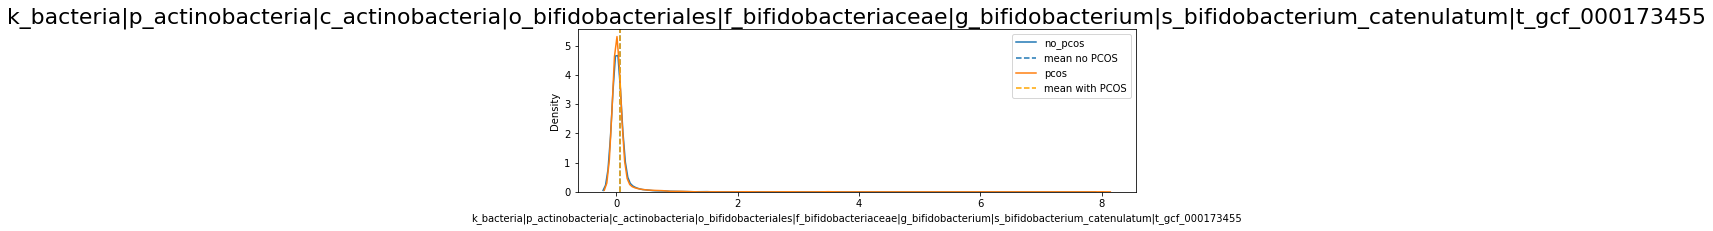

In [17]:
g_bifidobacterium = [col for col in df.columns if 'k_bacteria|p_actinobacteria|c_actinobacteria|o_bifidobacteriales|f_bifidobacteriaceae|g_bifidobacterium' in col]

density_plots(df, g_bifidobacterium)

In [18]:
g_adlercreutzia_list = [col for col in df.columns if 'k_bacteria|p_actinobacteria|c_actinobacteria|o_coriobacteriales|f_coriobacteriaceae|g_adlercreutzia' in col]

density_plots(df, g_adlercreutzia_list)

k_bacteria|p_bacteroidetes|c_bacteroidia|o_bacteroidales|f_bacteroidaceae|g_bacteroides|s_bacteroides_dorei|t_bacteroides_dorei_unclassified found significantally low in pcos patients


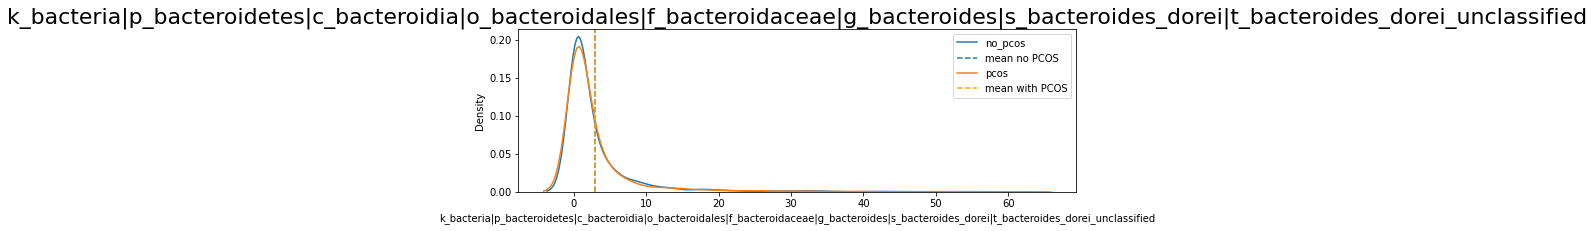

k_bacteria|p_bacteroidetes|c_bacteroidia|o_bacteroidales|f_bacteroidaceae|g_bacteroides|s_bacteroides_nordii|t_gcf_000273175 found significantally higher in pcos patients


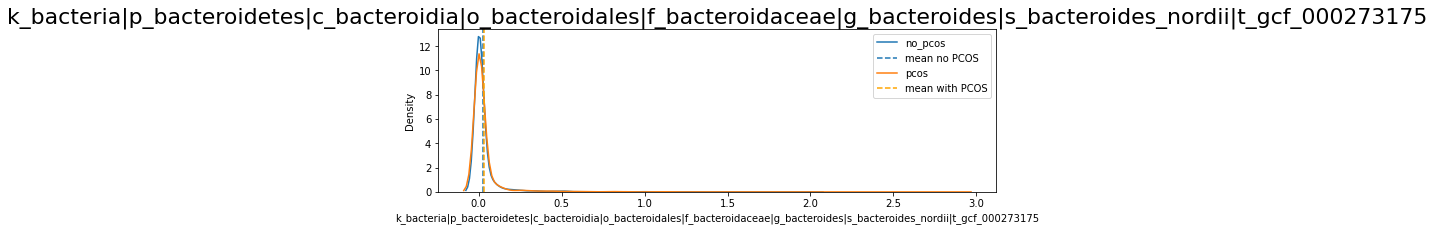

In [19]:
g_bacteroides_list = [col for col in df.columns if 'k_bacteria|p_bacteroidetes|c_bacteroidia|o_bacteroidales|f_bacteroidaceae|g_bacteroides' in col]

density_plots(df, g_bacteroides_list)

k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_lachnospiraceae|g_blautia|s_ruminococcus_gnavus found significantally higher in pcos patients


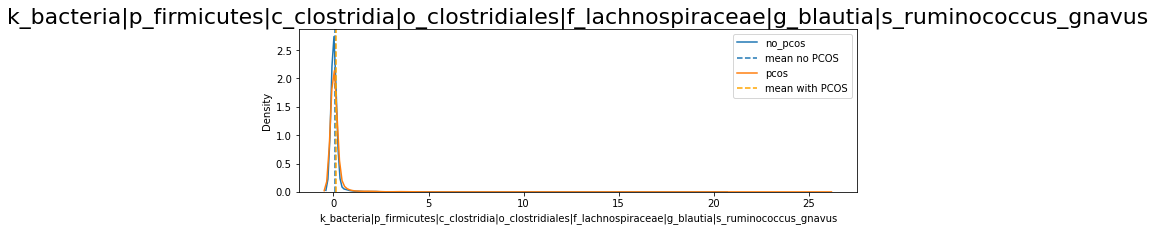

In [20]:
g_blautia_list = [col for col in df.columns if 'k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_lachnospiraceae|g_blautia' in col]

density_plots(df, g_blautia_list)

k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_lachnospiraceae|g_butyrivibrio|s_butyrivibrio_crossotus|t_gcf_000156015 found significantally low in pcos patients


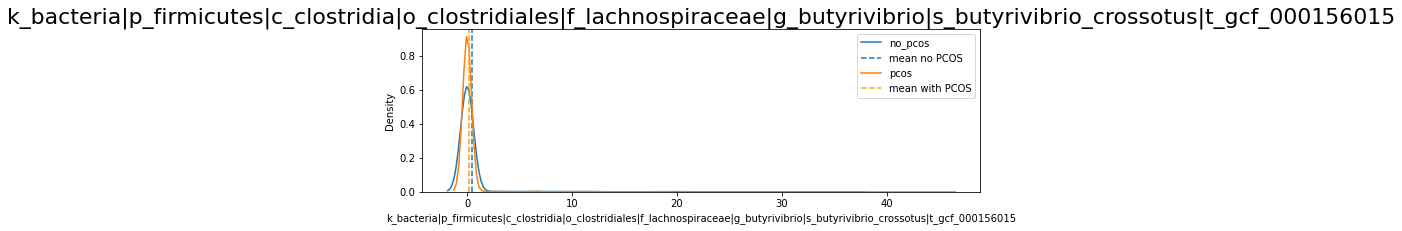

In [21]:
g_butyrivibrio_list = [col for col in df.columns if 'k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_lachnospiraceae|g_butyrivibrio' in col]

density_plots(df, g_butyrivibrio_list)

k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_ruminococcaceae|g_ruminococcus|s_ruminococcus_bromii|t_gcf_000209875 found significantally low in pcos patients


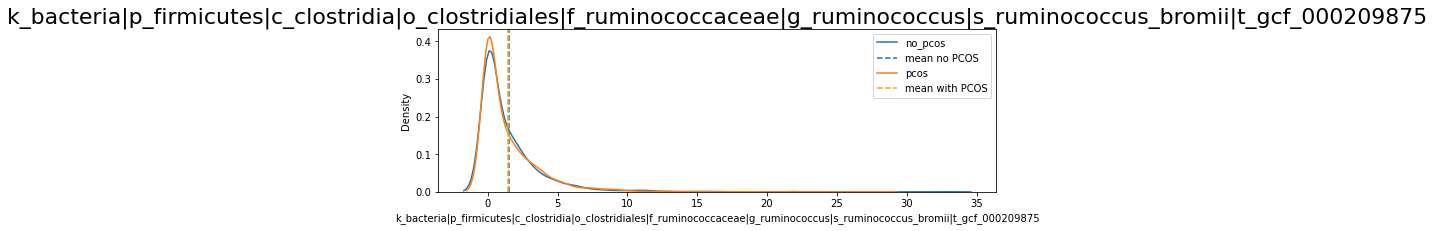

In [22]:
g_ruminococcus_list = [col for col in df.columns if 'k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_ruminococcaceae|g_ruminococcus|' in col]

density_plots(df, g_ruminococcus_list)

In [23]:
g_parabacteroides_list = [col for col in df.columns if 'k_bacteria|p_bacteroidetes|c_bacteroidia|o_bacteroidales|f_porphyromonadaceae|g_parabacteroides' in col]

density_plots(df, g_parabacteroides_list)

In [24]:
g_prevotella_list = [col for col in df.columns if 'k_bacteria|p_bacteroidetes|c_bacteroidia|o_bacteroidales|f_prevotellaceae|g_prevotella|' in col]

density_plots(df, g_prevotella_list)

In [25]:
g_roseburia_list = [col for col in df.columns if 'k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_lachnospiraceae|g_roseburia' in col]

density_plots(df, g_roseburia_list)

k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_clostridiaceae|g_clostridium|s_clostridium_symbiosum found significantally low in pcos patients


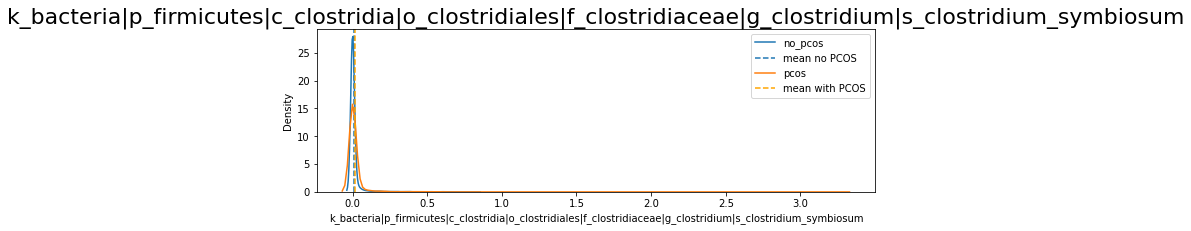

k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_clostridiaceae|g_clostridium|s_clostridium_nexile found significantally higher in pcos patients


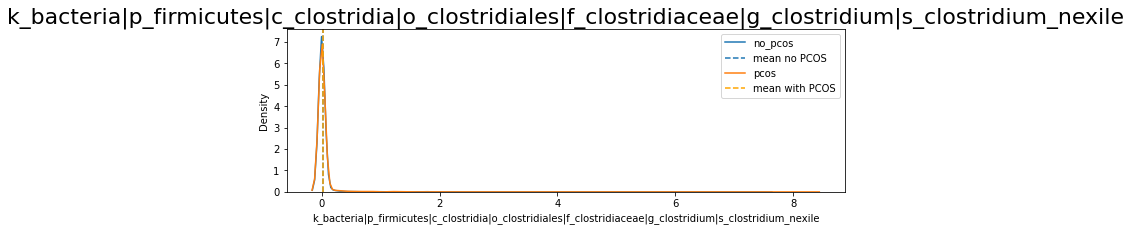

In [26]:
g_clostridium_list = [col for col in df.columns if 'k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_clostridiaceae|g_clostridium' in col]

density_plots(df, g_clostridium_list)

k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_lachnospiraceae|g_coprococcus|s_coprococcus_comes|t_gcf_000155875 found significantally low in pcos patients


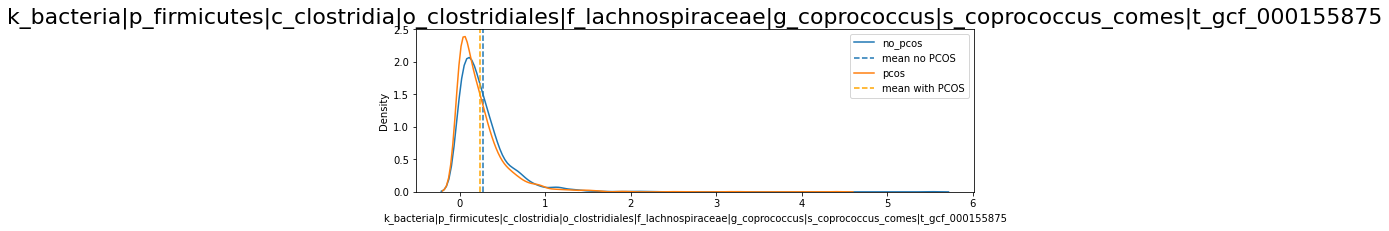

k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_lachnospiraceae|g_coprococcus|s_coprococcus_catus found significantally low in pcos patients


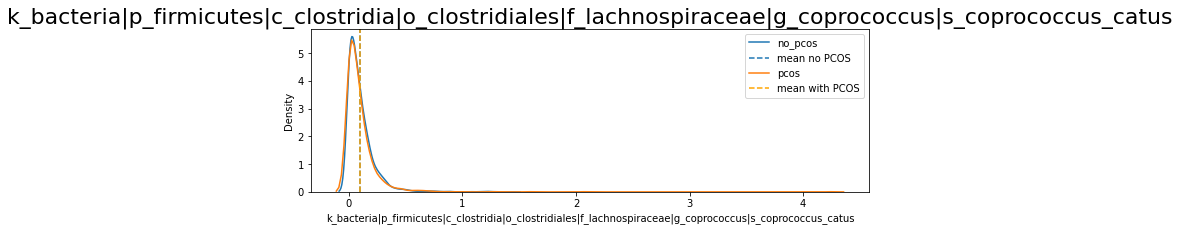

In [27]:
g_coprococcus_list = [col for col in df.columns if 'k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_lachnospiraceae|g_coprococcus' in col]

density_plots(df, g_coprococcus_list)

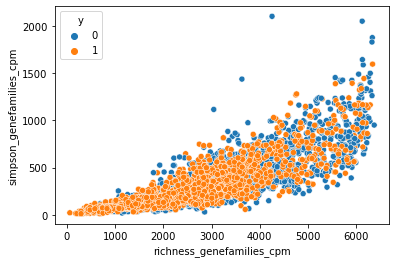

In [28]:
sns.scatterplot(
    data=df,y="simpson_genefamilies_cpm",x="richness_genefamilies_cpm", hue="y",
)
plt.show()

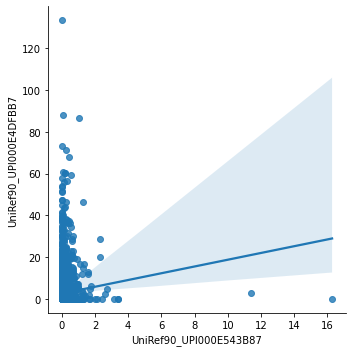

In [29]:
sns.lmplot(data=df, x="UniRef90_UPI000E543B87", y="UniRef90_UPI000E4DFBB7")
plt.show()

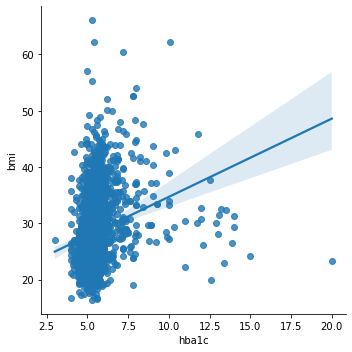

In [30]:
sns.lmplot(data=df, y="bmi", x="hba1c")
plt.show()

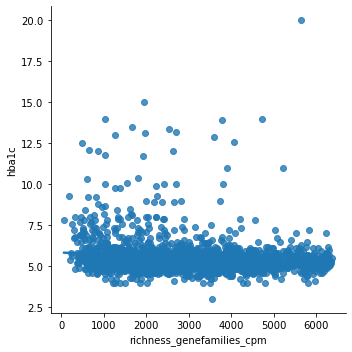

In [31]:
sns.lmplot(data=df, x="richness_genefamilies_cpm", y="hba1c")
plt.show()

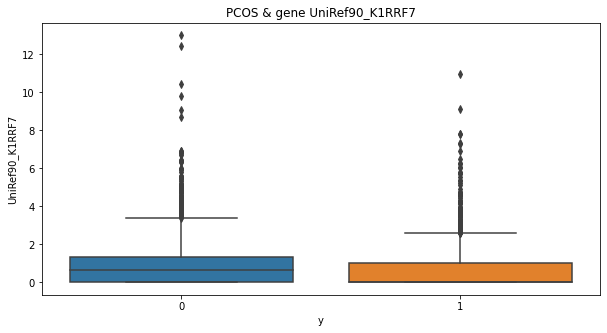

In [32]:
plt.figure(figsize=(10,5))
plt.title('PCOS & gene UniRef90_K1RRF7')
plt.xlabel('UniRef90_K1RRF7')
plt.ylabel('label')
sns.boxplot(df['y'], df['UniRef90_K1RRF7'])
plt.show()

In [33]:
null_lst = df.isnull().sum().divide(df.shape[0])
null_lst = null_lst[null_lst > 0.333].sort_values(ascending = False)

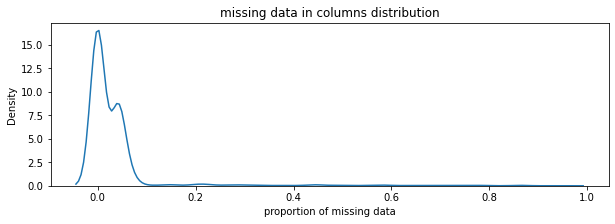

In [34]:
plt.figure(figsize=(10, 3))
sns.kdeplot(df.isnull().sum().divide(df.shape[0]))
plt.xlabel('proportion of missing data')
plt.title(label='missing data in columns distribution')
plt.show()

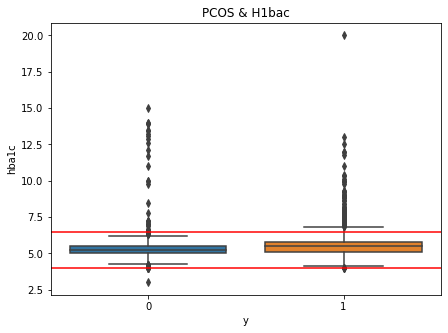

In [35]:
plt.figure(figsize=(7,5))
plt.title('PCOS & H1bac')
plt.xlabel('hba1c')
plt.ylabel('label')
graph = sns.boxplot(df['y'], df['hba1c'])
graph.axhline(4,  color='r')
graph.axhline(6.5,  color='r')
plt.show()

## Dimesoinality Reduction

In [36]:
#dropping the index column
df.drop('index', axis = 1, inplace = True)
# dropping all columns that more than 1/3 of their cells are null
for feat in null_lst.keys():
    if feat== "hba1c" or feat == "bmi" or feat == "y":
        continue
    else:
        df.drop(feat, axis = 1, inplace = True)

In [37]:
df_sample = df.sample(n=100) #due to computation considerations, we will conduct some of the calcutions on much smaller data sample

In [38]:
rho = df_sample.corr()

In [39]:
label_corr = rho["y"]
label_corr = label_corr.abs().sort_values(ascending=False)[1:]

In [40]:
bacterias = []
pwys = []
genes = []
others = []
for col,value in zip(label_corr.keys(), label_corr):
    if 'index'==  col or "bmi" == col or  'hba1c'== col or 'y'== col:
        others.append([col, value])
    elif "UniRef" in col:
        genes.append([col, value])
    elif "PWY" in col or "path" in col or "SIS" in col or "cycle" in col:
        pwys.append([col, value])
    elif "virus" in col:
        viruses.append([col, value])
    else:
        bacterias.append([col, value])

In [41]:
print("best bacterias to predict PCOS:\n")
for i in range(5):
    print(bacterias[i])
print("\n")
print("best pathways to predict PCOS:\n")
for i in range(5):
    print(pwys[i])
print("\n")
print("best becteria's genes to predict PCOS:\n")
for i in range(5):
    print(genes[i])
print("\n")

best bacterias to predict PCOS:

['shannon_genefamilies_cpm', 0.3664137695798257]
['fsgb__595', 0.35850024455607826]
['even_genefamilies_cpm', 0.34131675657897925]
['simpson_genefamilies_cpm', 0.3312461287439157]
['fsgb__2953|gsgb__9295|ssgb__14252', 0.32934226715865]


best pathways to predict PCOS:

['ARGININE-SYN4-PWY: L-ornithine biosynthesis II', 0.38172860430942995]
['FASYN-INITIAL-PWY: superpathway of fatty acid biosynthesis initiation (E. coli)', 0.35214312026305167]
['PWY-6703: preQ0 biosynthesis', 0.34764239213200965]
['PWY-5973: cis-vaccenate biosynthesis', 0.3447740970580899]
['PWY-7663: gondoate biosynthesis (anaerobic)', 0.3400067750950388]


best becteria's genes to predict PCOS:

['UniRef90_A0A0P0M4R8', 0.390474811601815]
['UniRef90_R5MXZ2', 0.3873341637392034]
['UniRef90_Q8A9S7', 0.38543910214406246]
['UniRef90_Q5LAX0', 0.3830789631238564]
['UniRef90_A0A0K6BVC0', 0.3815431721879799]




In [42]:
corr = rho[rho>=0.95]
corr = corr.abs()
corr = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))
corr

fsgb__1873|gsgb__4968|ssgb__6945   fsgb__2483|gsgb__6954|ssgb__9992    1.00
                                   fsgb__2483|gsgb__6954               1.00
fsgb__3040|gsgb__9544|ssgb__14950  fsgb__1414|gsgb__3429               1.00
fsgb__3040|gsgb__9544              fsgb__1414|gsgb__3429               1.00
fsgb__2483|gsgb__6998|ssgb__10120  fsgb__1380|gsgb__3364               1.00
                                                                       ... 
UniRef90_A0A373JXF8                UniRef90_R6EJA1                     0.95
UniRef90_R6W3N1                    UniRef90_R6W669                     0.95
UniRef90_R6EFR4                    UniRef90_R6W7P5                     0.95
UniRef90_R6EM78                    UniRef90_R6ES63                     0.95
UniRef90_A0A3B9CI44                UniRef90_R6WI91                     0.95
Length: 342871, dtype: float64

Some features are highly correlated

In [43]:
feat_deleted = []
for i in tqdm(corr.keys()):
    if corr.keys()[0] == 'y' or corr.keys()[1] == 'y' or corr.keys()[0] == 'bmi' or corr.keys()[1] == 'bmi' or corr.keys()[0] == 'hba1c' or corr.keys()[1] == 'hba1c':
        continue
    elif label_corr[i[0]] > label_corr[i[1]] and i[1] not in feat_deleted and i[1] in df.columns:
        df.drop(i[1], axis = 1, inplace = True)
        feat_deleted.append(i[1])
    elif label_corr[i[0]] < label_corr[i[1]] and i[0] not in feat_deleted and i[0] in df.columns:
        df.drop(i[0], axis = 1, inplace = True)
        feat_deleted.append(i[0])
    else:
        pass

100%|██████████| 342871/342871 [08:48<00:00, 648.19it/s] 


In [44]:
#another type of correlatin 
corr_dict={}
for column in df:
    x=df[column].fillna(df[column].median(),inplace = False)
    corr = stats.pointbiserialr(list(x), list(df['y']))
    corr_dict[column] = corr[0]
corr_dict = dict(sorted(corr_dict.items(), key=lambda item: abs(item[1]), reverse = True))
inx = 0
for item in corr_dict.items():
    if inx<30 and item[0]!='y':
        print(item[0], item[1])
        inx+=1


bmi 0.3109148065235667
richness_genefamilies_cpm -0.23885278009711736
shannon_genefamilies_cpm -0.22646628493448684
simpson_genefamilies_cpm -0.19273022078007515
UniRef90_A0A3E2B0N4 -0.1779891782545084
UniRef90_A0A077ZNL9 -0.17715280585988974
UniRef90_A0A1Y3RCS7 -0.17702340143656844
UniRef90_A0A3E2B0H7 -0.17677440179864906
UniRef90_A6P1V0 -0.17616667863642446
UniRef90_A0A1M6QS72 -0.16927247582979152
UniRef90_A0A176U5Z8 -0.16786359659727235
UniRef90_A7VC84 -0.16590962750309135
UniRef90_E7FVC2 -0.16576050218890417
even_genefamilies_cpm -0.16553206358685815
UniRef90_A0A3D2YGQ2 -0.16500339454023044
UniRef90_A0A1Q6N6R9 -0.1628100951669012
UniRef90_A0A3D5ZQ51 -0.16256085991271108
UniRef90_R9KYN1 -0.16187504785637974
UniRef90_A0A3D1M448 -0.16179628253069295
UniRef90_A0A1Y4M362 -0.16095265545676346
UniRef90_X0QG93 -0.16068301074183336
UniRef90_A0A351TNS4 -0.16048526233502863
UniRef90_A0A0P6CEL1 0.16003391521298008
UniRef90_A0A3D4G2J8 -0.1598269716231883
UniRef90_R5SG70 -0.15973315683421646
Uni

# T- test for features 

In [45]:
count = 0
significant_feat = []

for col in tqdm(df.columns):    
    try:
        pco_sample = df[(df.y == 1) & (df[col] != np.nan)].sample(n=50)
        no_pco_sample = df[(df.y == 0) & (df[col] != np.nan)].sample(n=50)
        res = rp.ttest(group1= pco_sample[col], group1_name= "with pco", group2=no_pco_sample[col], group2_name= "without pco")
        if list(res)[1].iloc[4,1] < 0.05:
            significant_feat.append(col)
        elif list(res)[1].iloc[5,1] < 0.05:
            significant_feat.append(col)
        else:
            if col!= "bmi" and col != "hba1c" and col!='y':
                count+=1
                df.drop(col, axis = 1, inplace = True)
    except:
        pass
print("There are ", len(significant_feat), " features that passed the t-test for p<0.05") # the number of columns that passed the t-test

100%|██████████| 9495/9495 [26:35<00:00,  5.95it/s]

There are  2200  features that passed the t-test for p<0.05


Column removal summarization

In [46]:
print("We started off with ", intial_n_columns,"columns:\n",
      len(null_lst),"was removed beause they were having too many missing values\n",
      len(feat_deleted),"was removed becuse they were highly correlated with other features\n", 
      count, "was removed because the differnce between pcos patients and women without pco weren't significant\n",
      "Total columns removed:", intial_n_columns-len(df.columns),
      ", which leaves us with" ,len(df.columns), "features") 

We started off with  13234 columns:
 321 was removed beause they were having too many missing values
 3418 was removed becuse they were highly correlated with other features
 6180 was removed because the differnce between pcos patients and women without pco weren't significant
 Total columns removed: 9919 , which leaves us with 3315 features


In [47]:
df.to_csv('out1.csv')

In [48]:
# in order to skip the long running time, we created a new file that contain all the changes in the dataset so far
df = pd.read_csv('out1.csv')

# Splitting train data into train and test data

In [49]:
y = df['y']
df.drop('y', axis=1,inplace=True)
df.drop('Unnamed: 0', axis = 1, inplace = True)
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.2, random_state = 40)
print ("X_train: ", len(X_train))
print("X_test: ", len(X_test))
print("y_train: ", len(y_train))
print("y_test: ", len(y_test))

X_train:  2684
X_test:  672
y_train:  2684
y_test:  672


# Null Values and Cleaning data  

In [50]:
# we created a numeric trnsfrmer that learns and impute the median values (the class is at main.py)
numeric_transformer = numeric_Transformer()
print(numeric_transformer)
numeric_transformer.fit(X_train)
x_train = numeric_transformer.transform(X_train)
pickle.dump(numeric_transformer, open('numeric_Transformer.pkl', 'wb'))

In [51]:
# Summarization of columns with null values
sum([True for idx,row in tqdm(x_train.iterrows()) if any(row.isnull())]) #calculate how many rows has nan values

2684it [00:01, 1609.55it/s]


0

In order to test some models, we need to scale our features. We chose standardization because most features looked like they have a gaussian distribution.

In [52]:
# We created a custom scaler because we couldn't manage to use the one in the 
class standardscaler2:
    def __init__(self):
        self.feat_means = []
        self.feat_stds =[]
    def fit(self, df):
        for col in df.columns:
            self.feat_means.append(df[col].mean())
            self.feat_stds.append(df[col].std())
        return self
    def transform(self, df):
        for col, mean, std in zip(df.columns, self.feat_means, self.feat_stds):
            for row in df.index.tolist():
                if std!=0:
                    df.loc[row,col] = ( df.loc[row,col] - mean)/std
                else:
                    df.loc[row,col] =  df.loc[row,col] - mean                    
        return df

In [53]:
x_train

,k_bacteria|p_bacteroidetes|c_bacteroidia|o_bacteroidales|f_bacteroidaceae|g_bacteroides|s_bacteroides_vulgatus,k_bacteria|p_bacteroidetes|c_bacteroidia|o_bacteroidales|f_bacteroidaceae,k_archaea|p_euryarchaeota|c_methanobacteria|o_methanobacteriales|f_methanobacteriaceae,k_archaea,k_archaea|p_euryarchaeota,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_ruminococcaceae|g_faecalibacterium|s_faecalibacterium_prausnitzii,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_ruminococcaceae|g_ruminococcus|s_ruminococcus_lactaris,k_bacteria|p_verrucomicrobia|c_verrucomicrobiae|o_verrucomicrobiales|f_verrucomicrobiaceae,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_lachnospiraceae|g_lachnospiraceae_noname,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_clostridiaceae|g_clostridium|s_clostridium_bolteae|t_clostridium_bolteae_unclassified,...,UniRef90_W4PTY7,UniRef90_W4V2J7,UniRef90_X0QG93,UniRef90_X0XU03,UniRef90_X8C8Q1,shannon_genefamilies_cpm,simpson_genefamilies_cpm,richness_genefamilies_cpm,bmi,hba1c
337,1.24660,4.69918,0.00000,0.00000,0.00000,6.99910,0.00000,0.00300,0.09654,0.00000,...,0.00000,0.155512,0.0,0.000000,0.000000,5.882960,71.861519,1437,28.360352,5.3
3128,4.07854,40.16359,0.10823,0.10823,0.10823,2.51996,0.00000,0.65661,0.14286,0.00000,...,0.00000,0.000000,0.0,0.313656,0.000000,6.743254,247.232675,3039,31.553659,5.3
1627,0.05734,17.64319,0.00000,0.00000,0.00000,0.89902,0.00000,25.54392,0.77698,0.02107,...,0.00000,0.000000,0.0,0.000000,0.040922,6.599157,322.789760,2290,30.593132,4.9
2918,1.82062,19.84775,4.85446,4.85446,4.85446,12.71059,0.02981,1.02781,0.04582,0.00000,...,0.00000,0.000000,0.0,0.000000,0.000000,6.909166,489.156023,2680,29.036738,5.3
1450,0.00000,4.48196,0.35109,0.35109,0.35109,5.45608,0.00000,0.00000,0.15999,0.00000,...,0.00000,0.000000,0.0,0.000000,0.000000,7.251967,438.933274,3285,23.889463,5.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,2.87513,19.73921,0.00000,0.00000,0.00000,40.98734,0.34696,0.27146,1.53351,0.00397,...,0.00000,0.000000,0.0,0.000000,0.043764,6.661019,273.089838,2864,43.433743,5.3
3064,9.83423,33.10773,0.00000,0.00000,0.00000,14.16477,0.00000,0.00000,0.96172,0.00000,...,0.00000,0.000000,0.0,0.000000,0.000000,6.223520,160.856535,2240,31.615793,5.9
2213,1.85480,13.74271,0.00000,0.00000,0.00000,5.25519,0.04801,2.14732,0.07886,0.10779,...,0.00000,0.000000,0.0,0.000000,0.995653,5.732017,93.511546,972,27.343750,5.3
2055,0.69912,36.93201,0.00000,0.00000,0.00000,2.89888,0.00000,0.00000,0.14021,0.00000,...,1.38436,0.969081,0.0,0.326339,0.107668,7.482123,733.663614,3678,28.888889,5.8


In [54]:
#long run time
scaler = standardscaler2()
scaler.fit(x_train)
X_train1 = x_train.copy()
X_train1 = scaler.transform(X_train1)
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [55]:
# We need to transform the test data too
x_test = numeric_transformer.transform(X_test)
x_test= scaler.transform(x_test)

Dimesionality Reduction Algorithms

PCA

In [56]:
#principal compounent analysis
pca = PCA(n_components=3, random_state = 35)
pca_result = pca.fit_transform(X_train1)
pca_one = pca_result[:,0]
pca_two = pca_result[:,1] 
pca_three = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.11322876 0.03696706 0.01944814]


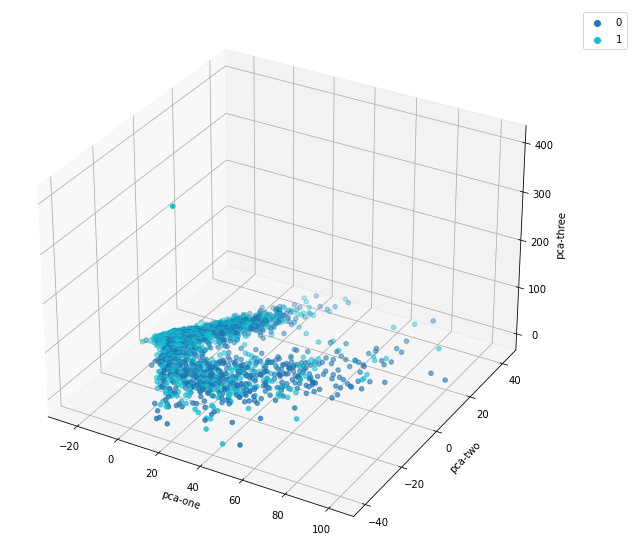

In [57]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
sc =ax.scatter(
    xs=pca_one, 
    ys=pca_two, 
    zs=pca_three, 
    c=y_train, 
    cmap='tab10'
)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

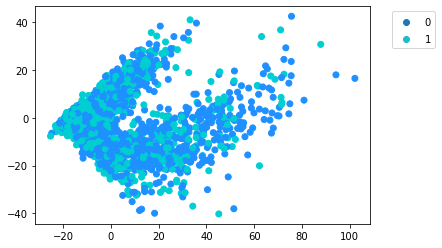

In [58]:
fig, ax = plt.subplots()
colors = {1:'darkturquoise', 0 :'dodgerblue'}
cs = ax.scatter(x= pca_one, y= pca_two, c=y_train.map(colors))
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

t-SNE

In [59]:
x_copy = X_train1.copy()
x_copy['y'] = y_train 
df_sample = x_copy.sample(n=1000)
tsne3 = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300, random_state = 42)
tsne_results = tsne3.fit_transform(df_sample)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.006s...
[t-SNE] Computed neighbors for 1000 samples in 0.085s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 8.587741
[t-SNE] KL divergence after 250 iterations with early exaggeration: 136.925980
[t-SNE] KL divergence after 300 iterations: 5.010341


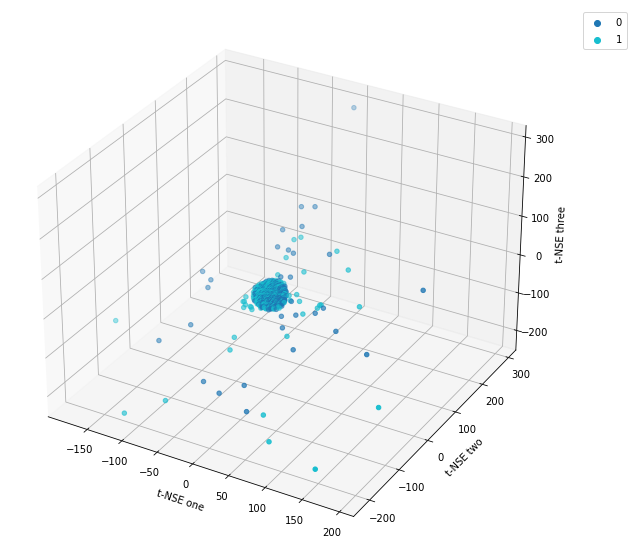

In [60]:
df_sample['tsne-3d-one'] = tsne_results[:,0]
df_sample['tsne-3d-two'] = tsne_results[:,1]
df_sample['tsne-3d-two'] = tsne_results[:,2]

ax = plt.figure(figsize=(16,10)).gca(projection='3d')
sc =ax.scatter(
    xs=df_sample['tsne-3d-one'], 
    ys=df_sample['tsne-3d-two'], 
    zs=df_sample['tsne-3d-two'], 
    c=df_sample['y'], 
    cmap="tab10", 
)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
ax.set_xlabel('t-NSE one')
ax.set_ylabel('t-NSE two')
ax.set_zlabel('t-NSE three')
plt.show()

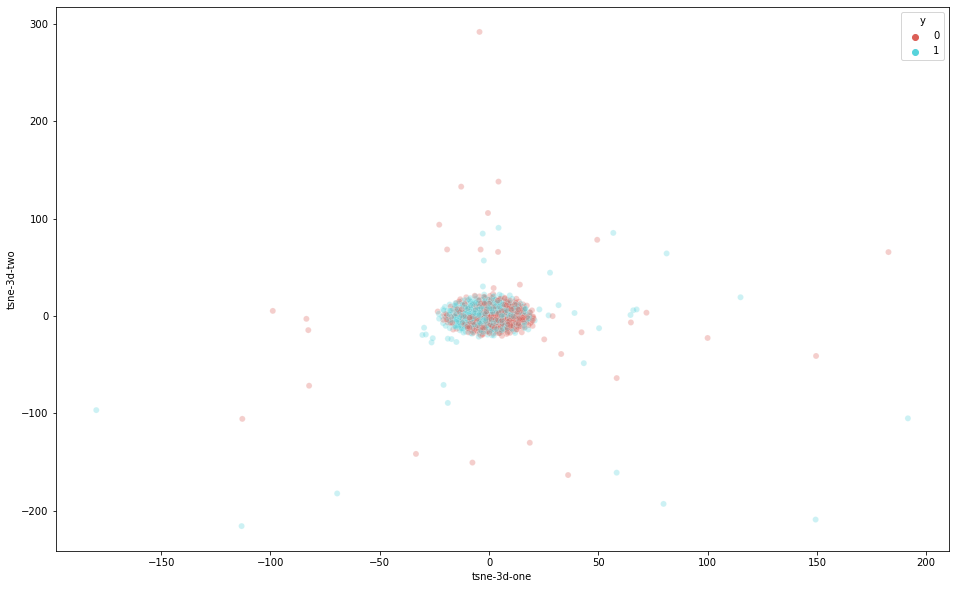

In [61]:

plt.figure(figsize=(16,10))
sns.scatterplot(
    x='tsne-3d-one', y="tsne-3d-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df_sample,
    legend="full",
    alpha=0.3
)
plt.show()

There is no way to seperate the data by one linear/parabolic line after using t-NSE either

In [62]:
#creates confusion matrix + roc curve for a given model and dataset
def estimate_model(alg, x_train, x_test, y_train, y_test):    
    model_alg = alg.fit(x_train, y_train)
    global y_probablity, y_pred, test_prob #global variables in order to not be deleted at the end of function
    y_probablity = model_alg.predict_proba(x_test)[:,1] #predicting probability of label
    y_pred = model_alg.predict(x_test) #predicting label
    test_prob = model_alg.predict_proba(x_test)[:,1] #testing the real test
    train_pred = model_alg.predict(x_train)
    name = type(alg).__name__
    nn_cm = confusion_matrix(y_test, y_pred) # Creating the confusion matrix
    
    
    # Visualization:
    f, ax = plt.subplots(figsize=(5,5))
    #sns.heatmap(nn_cm, annot=True, linewidth=0.7, linecolor='olive', fmt='.0f', ax=ax, cmap='YlGnBu')
    sns.heatmap(nn_cm, annot=True, linewidth=0.7, linecolor='black', fmt='.0f', ax=ax, cmap='Pastel1')

    plt.title(name)
    plt.xlabel('y_pred')
    plt.ylabel('y_test')
    plt.show()        

#calculates train_accuracy, auc, test_accuracy for a given model and dataset
    
def model_metrics(model, x_train, x_test, y_train, y_test, plot = True, printt = True): #making AUC for every model, the final AUC is the mean of k folds
    tprs = []
    aucs = []
    train_acc=[]
    test_acc=[]
    mean_fpr = np.linspace(0,1,100)
    i = 1
    if plot == True:
        fig1 = plt.figure(figsize=[12,12])
    cv = KFold(n_splits=5, random_state=7, shuffle=True)
    i=1
    for train_index, test_index in cv.split(df): #checking for every k fold 
        model.fit(x_train, y_train)  # Run Models
        prediction = model.predict_proba(x_test)
        fpr, tpr, t = roc_curve(y_test, prediction[:, 1]) #making ROC curve
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        roc_auc = metrics.auc(fpr, tpr)
        aucs.append(roc_auc)
        train_acc.append(model.score(x_train,y_train)*100)
        test_acc.append(model.score(x_test,y_test)*100)
        
        if plot == True:
            plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        i= i+1
    if plot == True:
        plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = metrics.auc(mean_fpr, mean_tpr)
    train_accuracy = np.mean(train_acc)
    test_accuracy = np.mean(test_acc)
    if plot == True:
        plt.plot(mean_fpr, mean_tpr, color='blue',
                 label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC')
        plt.legend(loc="lower right")
        plt.text(0.32,0.7,'More accurate area',fontsize = 12)
        plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
        plt.show()
    if printt == True:
        print("Train_accuracy:",train_accuracy, "\n")
        print("AUC:", mean_auc, "\n")
        print("Test_accuracy:", test_accuracy)
    else:
        return train_accuracy, mean_auc, test_accuracy

## Testing Differenct ML Algorithms Perfomance 

### <span style="color: blue">Decision Tree</span>

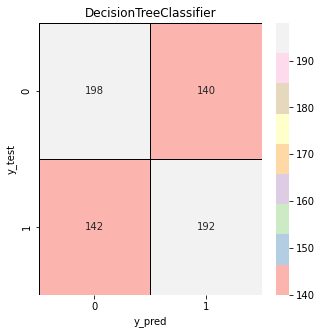

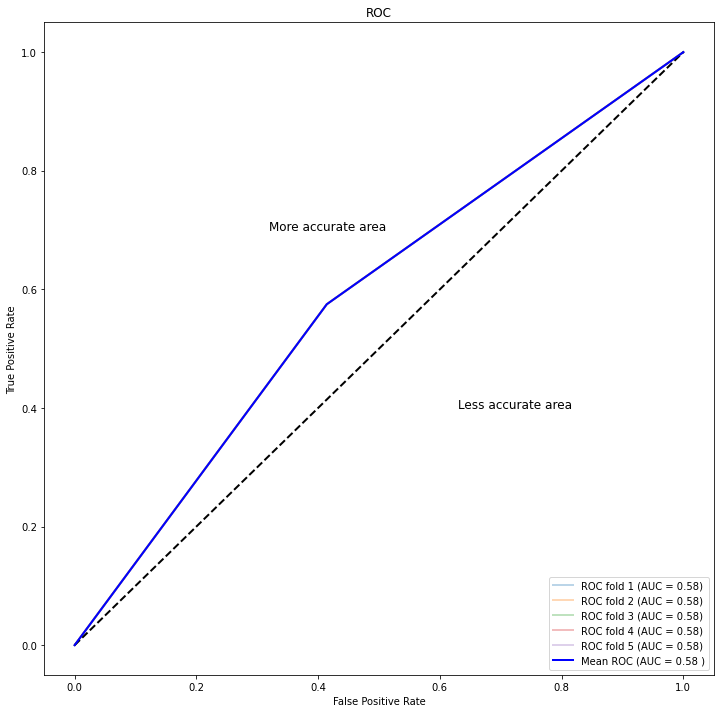

Train_accuracy: 100.0 

AUC: 0.5803243593046906 

Test_accuracy: 58.03571428571429


In [63]:
dtc = DecisionTreeClassifier(random_state=32)
estimate_model(dtc,  X_train1, x_test, y_train, y_test)
model_metrics(dtc, X_train1, x_test, y_train, y_test)

### <span style="color: blue">KNN</span>

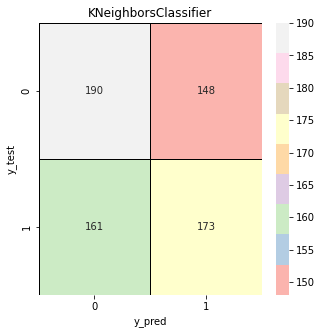

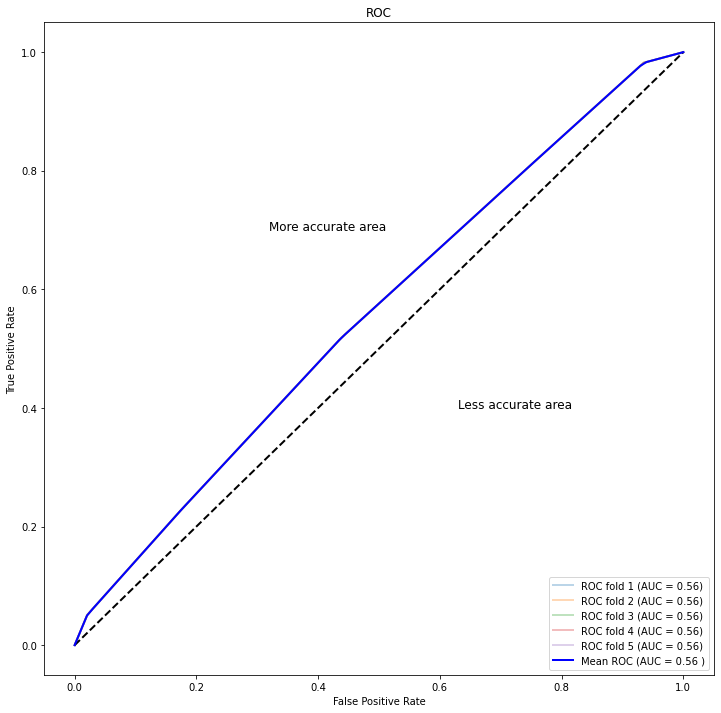

Train_accuracy: 72.65275707898658 

AUC: 0.5575765483627675 

Test_accuracy: 54.01785714285713


In [64]:
knn = KNeighborsClassifier()
estimate_model(knn,  X_train1, x_test, y_train, y_test)
model_metrics(knn, X_train1, x_test, y_train, y_test)

### <span style="color: blue">Logistic Regression</span> 

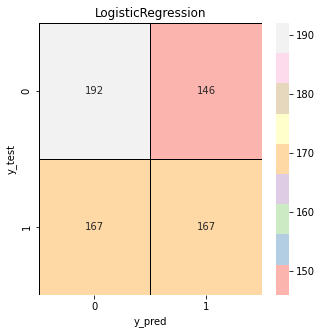

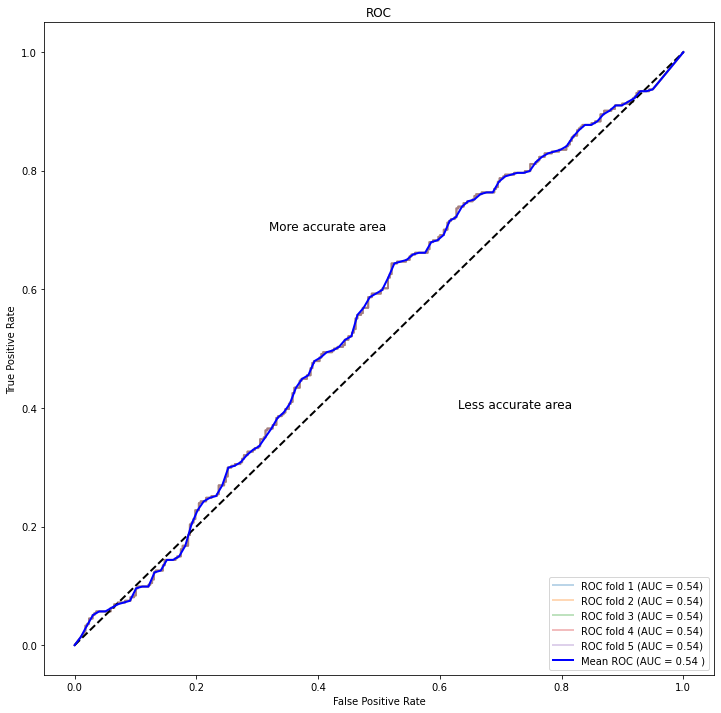

Train_accuracy: 100.0 

AUC: 0.544437715493109 

Test_accuracy: 53.42261904761905


In [65]:
lr = LogisticRegression(random_state=42)
estimate_model(lr, X_train1, x_test, y_train, y_test)
model_metrics(lr, X_train1, x_test, y_train, y_test)

### <span style="color: blue">Random Forest</span> 

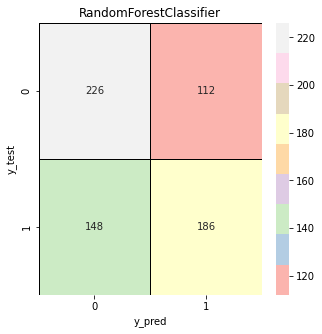

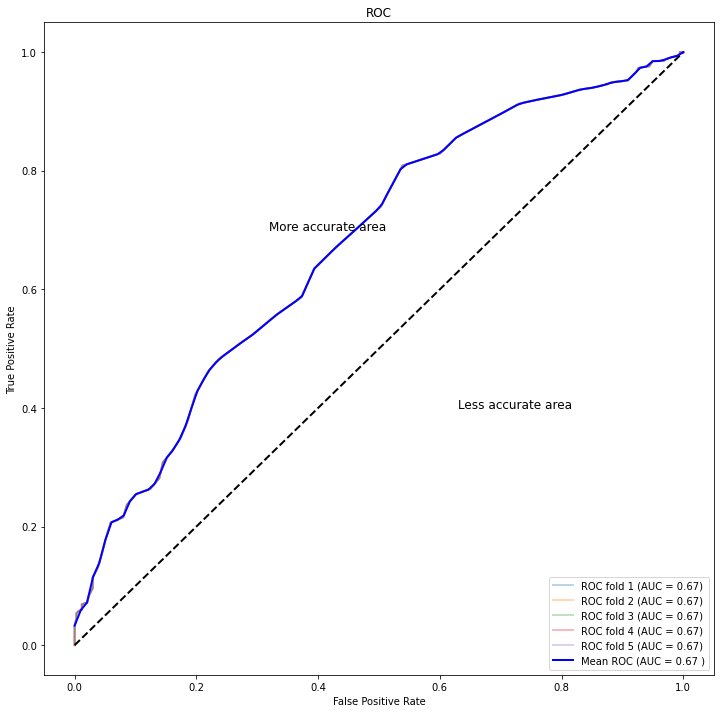

Train_accuracy: 100.0 

AUC: 0.6728510322897305 

Test_accuracy: 61.30952380952381


In [66]:
rf = RandomForestClassifier(random_state=42)
estimate_model(rf, X_train1, x_test, y_train, y_test)
model_metrics(rf, X_train1, x_test, y_train, y_test)

### <span style="color: blue">MLP Classifier</span>  


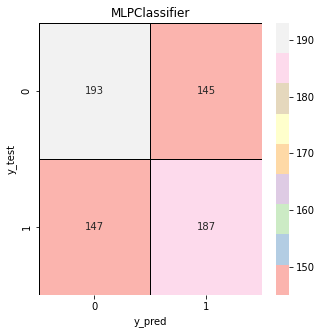

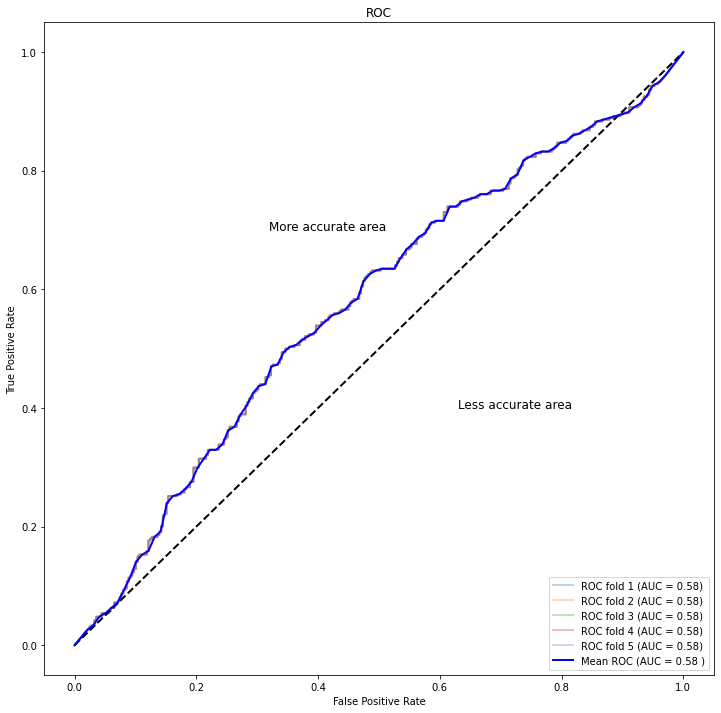

Train_accuracy: 100.0 

AUC: 0.5755074892557503 

Test_accuracy: 56.54761904761905


In [67]:
mlp = MLPClassifier(random_state=42)
estimate_model(mlp, X_train1, x_test, y_train, y_test)
model_metrics(mlp, X_train1, x_test, y_train, y_test)

### <span style="color: blue">Naive Bayes</span>  


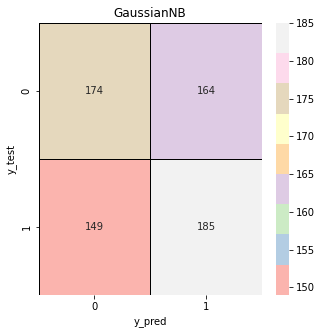

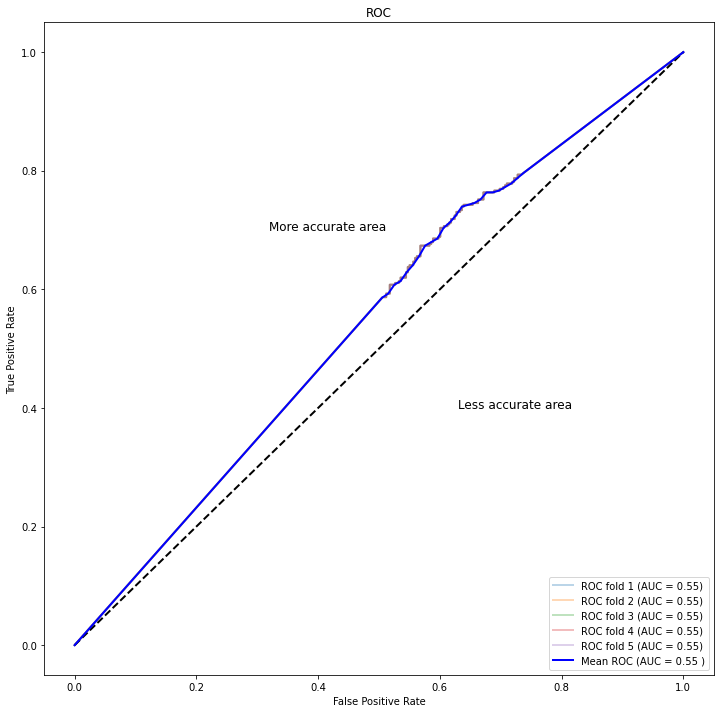

Train_accuracy: 69.44858420268257 

AUC: 0.5476529603678812 

Test_accuracy: 53.42261904761905


In [68]:
nb = GaussianNB()
estimate_model(nb, X_train1, x_test, y_train, y_test)
model_metrics(nb, X_train1, x_test, y_train, y_test)

#### Desicion Tree Classifier for Demonstrating the Classification of Patients

Best parameters are: {'criterion': 'entropy', 'max_depth': 3}
AVG Train AUC: 0.675


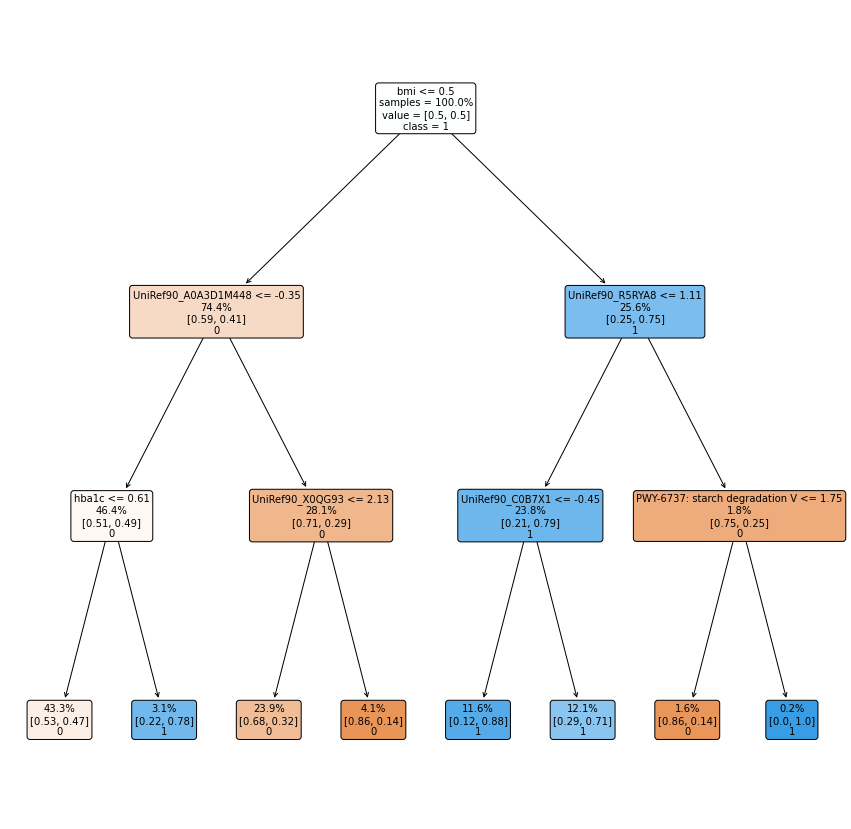

Validation AUC: 0.669
Validation Accuracy: 0.646


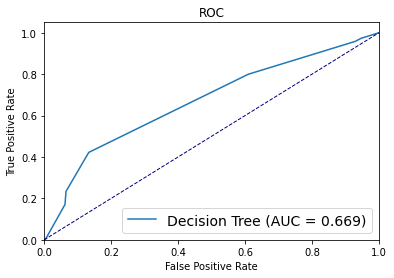

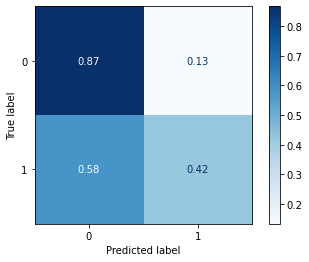

In [69]:
classifier = DecisionTreeClassifier(random_state=32)
params = {'max_depth': [3,4,5] , 'criterion':['gini','entropy']}
clf_model = GridSearchCV(classifier, param_grid=params, scoring = 'roc_auc', cv=5,n_jobs=-1)
clf_model.fit(X_train1, y_train.values.ravel())

# Run the model with the best parameters
best_params = clf_model.best_params_
print('Best parameters are: {}'.format(best_params))
print('AVG Train AUC: {:.3f}'.format(clf_model.best_score_))                     

model_for_pred = DecisionTreeClassifier(random_state=32, **best_params)

model_for_pred.fit(X_train1, y_train)

fig, ax = plt.subplots(figsize=(15, 15))
tree.plot_tree(model_for_pred,rounded=True,filled=True,precision=2,proportion= True,label='root',class_names=['0','1'],impurity=False,feature_names=x_train.columns, fontsize=10)
plt.show()



y_pred = model_for_pred.predict_proba(x_test)[:,1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
auc = metrics.auc(fpr,tpr)
accuracy_score1 = metrics.accuracy_score(y_test, np.round(y_pred))
print('Validation AUC: {:.3f}'.format(auc))                     
print('Validation Accuracy: {:.3f}'.format(accuracy_score1))
#----- Plots -----

# Plot ROC
lw=1
plt.figure()
plt.plot(fpr,tpr,label='Decision Tree (AUC = {:.3f})'.format(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right",fontsize=14)
plt.show()

# Plot Confusion Matrix
metrics.plot_confusion_matrix(model_for_pred,x_test,y_test,cmap=plt.cm.Blues, normalize='true')

### Hyperparmeters Tuning the Two Models that Have the Biggest AUC Scores
##### <span style="color: green">Logistic Regression, Random Forests:</span>

In [70]:
param_range_fl =  [100, 10, 1.0, 0.5, 0.1, 0.01]
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
learning_rates = [.1,.2,.3]
max_depth = [int(x) for x in np.linspace(10, 110, num = 10)]
min_samples_leaf = [1, 2, 10]
min_samples_split = [2, 5, 10]


lr_param_grid = [{'penalty': ['l1', 'l2', 'none'],
                   'C': param_range_fl,
                   'solver': ['liblinear']}]
rf_param_grid = [{'min_samples_leaf': min_samples_leaf,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                    'bootstrap': [True, False]}]
#GridSearch- the two models
lr_grid_search = GridSearchCV(estimator = LogisticRegression(random_state=42),
        param_grid=lr_param_grid,
        scoring='roc_auc',
        cv=5, verbose=1)

rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
        param_grid=rf_param_grid,
        scoring='roc_auc',
        cv=5, verbose=1)
grids = [lr_grid_search, rf_grid_search]
for pipe in grids:
    pipe.fit(X_train1,y_train)
    
grid_dict = {0: 'Logistic Regression', 
             1: 'Random Forest'}

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [71]:
for i, model in enumerate(grids):   
    print('{} Test accuracy {}'.format(grid_dict[i], accuracy_score(y_test, model.predict(x_test))))
    print('{} AUC score {}'.format(grid_dict[i], model.score(x_test,y_test)))
    print('{} Best Params: {}'.format(grid_dict[i], model.best_params_))
    print('{} Mean cross-validated score of the best_estimator: {}'.format(grid_dict[i], model.best_score_))

Logistic Regression Test accuracy 0.6577380952380952
Logistic Regression AUC score 0.7083052829252736
Logistic Regression Best Params: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Logistic Regression Mean cross-validated score of the best_estimator: 0.6990496906523258
Random Forest Test accuracy 0.6205357142857143
Random Forest AUC score 0.6633685292137619
Random Forest Best Params: {'bootstrap': False, 'max_depth': 21, 'min_samples_leaf': 10, 'min_samples_split': 2}
Random Forest Mean cross-validated score of the best_estimator: 0.6751222422261438


As we can see, Logistic regression have higher scores at all metrics

## Feature Selection 

In [72]:
#rates feature importance by coefficient size 
model = LogisticRegression(C= 0.01, penalty='l1', solver= 'liblinear', random_state=42)
# fit the model
model.fit(X_train1, y_train)
importance_dict={}
# get importance
importance = model.coef_[0]
for i,v in zip(X_train1.columns,importance):
    importance_dict[i] = abs(v)
sorted_dict = dict(sorted(importance_dict.items(), key=lambda item: item[1], reverse=True))
print("Features by importance:\n")
inx=0
for i in sorted_dict.items():
    if inx<20:
        print("{} : {}".format(i[0],i[1]))
        inx+=1


Features by importance:

bmi : 0.45966428619826083
richness_genefamilies_cpm : 0.17992179571132436
UniRef90_A0A0P6CEL1 : 0.05691921613161009
UniRef90_X0QG93 : 0.049078396867866116
UniRef90_K1RS62 : 0.04372591299022486
UniRef90_A0A3D5ZQ51 : 0.01526002584635384
UniRef90_R6EF19 : 0.008846097588461665
UniRef90_R7NZV6 : 0.004445027372560606
UniRef90_A0A078RCN3 : 0.0019180698628954655
k_bacteria|p_bacteroidetes|c_bacteroidia|o_bacteroidales|f_bacteroidaceae|g_bacteroides|s_bacteroides_vulgatus : 0.0
k_bacteria|p_bacteroidetes|c_bacteroidia|o_bacteroidales|f_bacteroidaceae : 0.0
k_archaea|p_euryarchaeota|c_methanobacteria|o_methanobacteriales|f_methanobacteriaceae : 0.0
k_archaea : 0.0
k_archaea|p_euryarchaeota : 0.0
k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_ruminococcaceae|g_faecalibacterium|s_faecalibacterium_prausnitzii : 0.0
k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_ruminococcaceae|g_ruminococcus|s_ruminococcus_lactaris : 0.0
k_bacteria|p_verrucomicrobia|c_verruc

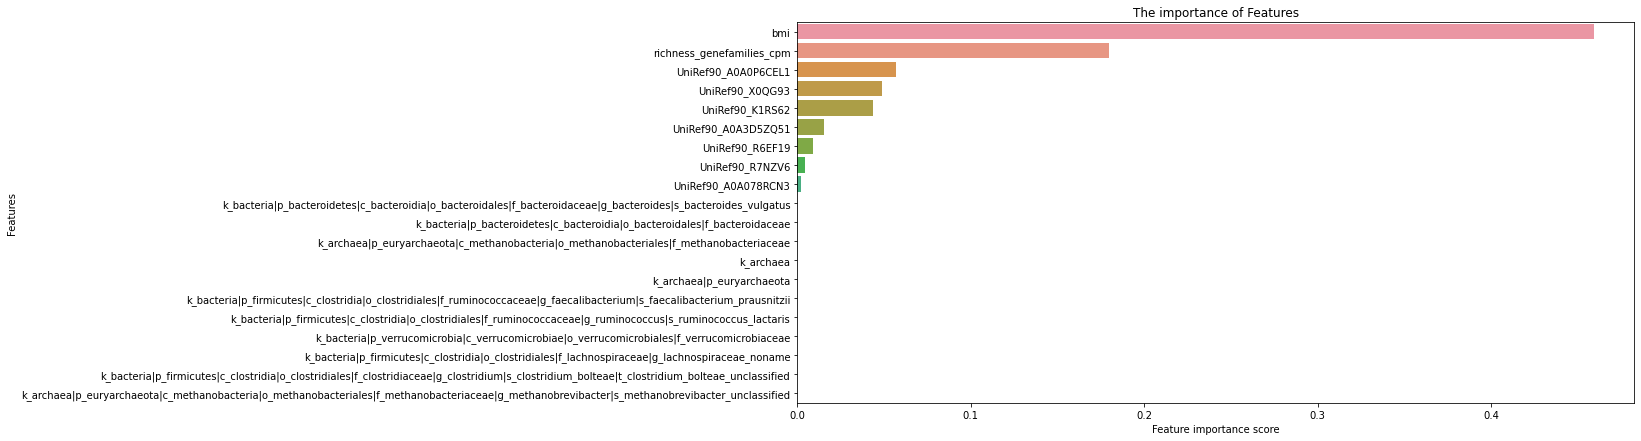

In [73]:
f, ax = plt.subplots(figsize=(15, 7))
sns.barplot(y=list(sorted_dict.keys())[:20], x=list(sorted_dict.values())[:20])
ax.set_title("The importance of Features")
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [74]:
def truncate(number, digits):
    pow10 = 10 ** digits
    return number * pow10 // 1 / pow10

In [75]:
results_auc = []
features_by_importance = list(sorted_dict.keys())
train_acc_score = []
auc_score = []
test_acc_score = []
results_accuracy = []
clf = LogisticRegression(C= 0.01, penalty= 'l1', solver='liblinear', random_state=42)
x_test= pd.DataFrame(x_test, columns = X_train1.columns)
random.seed(30)
train_inx = random.sample(range(len(X_train1)),500)
random.seed(30)
test_inx = random.sample(range(len(x_test)),500)

for k in range(50, len(features_by_importance)+1,50):
    temp_train = X_train1.iloc[train_inx][features_by_importance[:int(k)]]
    temp_test = x_test.iloc[test_inx][features_by_importance[:int(k)]]
    scores = model_metrics(clf, temp_train, temp_test, y_train.iloc[train_inx] , y_test.iloc[test_inx], plot = False, printt = False)
    train_acc_score.append(truncate(scores[0],2))
    auc_score.append(truncate(scores[1],4))
    test_acc_score.append(truncate(scores[2],2))
    # summarize the results
    print('>%d features: train accuracy score %.3f, auc score %.3f,  test accuracy score %.3f' % (k, scores[0], scores[1], scores[2]))

>50 features: train accuracy score 48.200, auc score 0.500,  test accuracy score 50.800
>100 features: train accuracy score 48.200, auc score 0.500,  test accuracy score 50.800
>150 features: train accuracy score 48.200, auc score 0.500,  test accuracy score 50.800
>200 features: train accuracy score 48.200, auc score 0.500,  test accuracy score 50.800
>250 features: train accuracy score 48.200, auc score 0.500,  test accuracy score 50.800
>300 features: train accuracy score 48.200, auc score 0.500,  test accuracy score 50.800
>350 features: train accuracy score 48.200, auc score 0.500,  test accuracy score 50.800
>400 features: train accuracy score 48.200, auc score 0.500,  test accuracy score 50.800
>450 features: train accuracy score 48.200, auc score 0.500,  test accuracy score 50.800
>500 features: train accuracy score 48.200, auc score 0.500,  test accuracy score 50.800
>550 features: train accuracy score 48.200, auc score 0.500,  test accuracy score 50.800
>600 features: train a

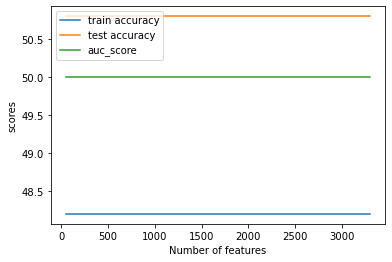

In [76]:
auc_scores =  [x*100 for x in auc_score]
plt.plot( range(50, len(features_by_importance)+1,50), train_acc_score, label = 'train accuracy')
plt.plot( range(50, len(features_by_importance)+1,50), test_acc_score, label = 'test accuracy')
plt.plot( range(50, len(features_by_importance)+1,50), auc_scores, label = 'auc_score')

plt.xlabel('Number of features')
plt.ylabel('scores')
plt.legend(loc="upper left")
plt.show()

In [77]:
print("As we can see the model with the highest auc score is a model based on ",( range(50, len(features_by_importance)+1,50))[np.argmax(auc_scores)], "features")
print("As we can see the model with the highest test accuracy score is a model based on ",( range(50, len(features_by_importance)+1,50))[np.argmax(test_acc_score)], "features")

As we can see the model with the highest auc score is a model based on  50 features
As we can see the model with the highest test accuracy score is a model based on  50 features


In [78]:
#Let's see test accuracy performance on even smaller number of features
results_auc = []
features_by_importance = list(sorted_dict.keys())
train_acc_score = []
auc_score = []
test_acc_score = []
results_accuracy = []
clf = LogisticRegression(C= 0.01, penalty= 'l1', solver='liblinear', random_state=42)
x_test= pd.DataFrame(x_test, columns = X_train1.columns)
random.seed(42)
train_inx = random.sample(range(len(x_train)),500)
random.seed(35)
test_inx = random.sample(range(len(x_test)),200)

for k in range(1, 51):
    temp_train = x_train.iloc[train_inx][features_by_importance[:int(k)]]
    temp_test = x_test.iloc[test_inx][features_by_importance[:int(k)]]
    scores = model_metrics(clf, temp_train, temp_test, y_train.iloc[train_inx] , y_test.iloc[test_inx], plot = False, printt = False)
    results_auc.append(scores[1])
    results_accuracy.append(scores[2])
    # summarize the results
    print('>%d features: train accuracy score %.3f, auc score %.3f,  test accuracy score %.3f' % (k, scores[0], scores[1], scores[2]))
    train_acc_score.append(truncate(scores[0],3))
    auc_score.append(truncate(scores[1],6))
    test_acc_score.append(truncate(scores[2],3))

>1 features: train accuracy score 48.200, auc score 0.714,  test accuracy score 67.500
>2 features: train accuracy score 61.400, auc score 0.715,  test accuracy score 67.500
>3 features: train accuracy score 61.200, auc score 0.715,  test accuracy score 67.500
>4 features: train accuracy score 61.400, auc score 0.715,  test accuracy score 67.500
>5 features: train accuracy score 61.400, auc score 0.715,  test accuracy score 67.500
>6 features: train accuracy score 61.200, auc score 0.715,  test accuracy score 67.500
>7 features: train accuracy score 61.400, auc score 0.715,  test accuracy score 67.500
>8 features: train accuracy score 61.200, auc score 0.715,  test accuracy score 67.500
>9 features: train accuracy score 61.400, auc score 0.715,  test accuracy score 67.500
>10 features: train accuracy score 61.400, auc score 0.715,  test accuracy score 67.500
>11 features: train accuracy score 61.000, auc score 0.715,  test accuracy score 66.500
>12 features: train accuracy score 61.000

In [79]:
print("As we can see the model with the highest auc score is a model based on",(range(1, 51))[np.argmax(results_auc)], "features")
print("As we can see the model with the highest test accuracy score is a model based on",(range(1, 51))[np.argmax(results_accuracy)], "features")


As we can see the model with the highest auc score is a model based on 2 features
As we can see the model with the highest test accuracy score is a model based on 1 features


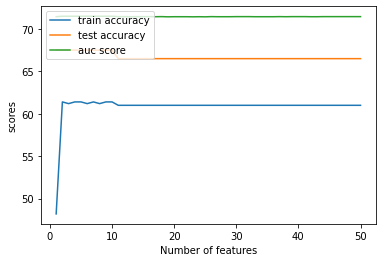

In [80]:
plt.plot( range(1, 51), train_acc_score, label = 'train accuracy')
plt.plot( range(1, 51), test_acc_score, label = 'test accuracy')
plt.plot( range(1, 51), [100*i for i in auc_score], label = 'auc score')

plt.xlabel('Number of features')
plt.ylabel('scores')
plt.legend(loc="upper left")
plt.show()

In [81]:
top_best = features_by_importance[:2]
top_best.sort(reverse = True)
train_x = X_train1[top_best]
test_x = x_test[top_best]

In [82]:
features_by_importance[:2]

['bmi', 'richness_genefamilies_cpm']

In [84]:
with open('features_by_importance.txt', 'w') as f:
    for item in top_best:
            f.write("%s\n" % item)        

## Outlier Removal 
Can generalize our model and lead to higher accuracy

In [85]:
train_rslt= []
test_rslt= []
auc_rslt = []
clf = LogisticRegression(C = 0.01, penalty= 'l1', solver= 'liblinear', random_state=42)
mcd_train = MinCovDet(random_state = 20)
mcd_train.fit(train_x)
d_train = mcd_train.mahalanobis(train_x)
#we will examine the accuracy of every precentile threshold
for k in tqdm(range(50,101,1)):
    threshold_train = np.percentile(d_train, k)
    mask_train_mahalanobis = d_train > threshold_train
    #clean outliers from train data
    temp_x_train = train_x[~mask_train_mahalanobis]
    temp_y_train = y_train[~mask_train_mahalanobis]
    train_accuracy, auc, test_accuracy = model_metrics(clf, temp_x_train, test_x, temp_y_train, y_test, plot = False, printt = False)

    train_rslt.append(truncate(train_accuracy,2))
    test_rslt.append(truncate(test_accuracy,2))
    auc_rslt.append(truncate(auc,4))

100%|██████████| 51/51 [00:03<00:00, 15.59it/s]


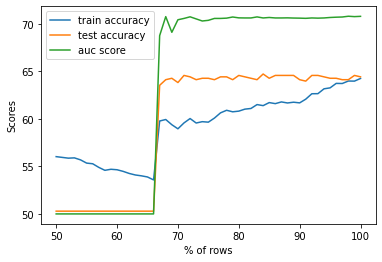

In [86]:
auc_rslt =  [x*100 for x in auc_rslt]

plt.plot(range(50,101,1), train_rslt, label = 'train accuracy')
plt.plot(range(50,101,1), test_rslt, label = 'test accuracy')
plt.plot(range(50,101,1), auc_rslt, label = 'auc score')
plt.xlabel('% of rows')
plt.ylabel('Scores')
plt.legend(loc="upper left")
plt.show()

In [87]:
max_auc_idx = auc_rslt.index(max(auc_rslt))
print("We need to remove", 100 - range(50,101,1)[max_auc_idx],"% of data as outliers in order to optimize our results to get", round(max(auc_rslt),3),"AUC score")
max_acc_idx = test_rslt.index(max(test_rslt))
print("We need to remove", 100 - range(50,101,1)[max_acc_idx],"% of data as outliers in order to optimize our results to get", round(max(test_rslt),3), "accuracy score")

We need to remove 2 % of data as outliers in order to optimize our results to get 70.81 AUC score
We need to remove 16 % of data as outliers in order to optimize our results to get 64.73 accuracy score


In [88]:
threshold_train = np.percentile(d_train, range(50,101,1)[max_auc_idx])
mask_train_mahalanobis = d_train > threshold_train
#clean outliers from train data
temp_x_train = train_x[~mask_train_mahalanobis]
temp_y_train = y_train[~mask_train_mahalanobis]

### Creating an adjusted scaler & model to the 2-feature dataset

In [89]:
x_train

,k_bacteria|p_bacteroidetes|c_bacteroidia|o_bacteroidales|f_bacteroidaceae|g_bacteroides|s_bacteroides_vulgatus,k_bacteria|p_bacteroidetes|c_bacteroidia|o_bacteroidales|f_bacteroidaceae,k_archaea|p_euryarchaeota|c_methanobacteria|o_methanobacteriales|f_methanobacteriaceae,k_archaea,k_archaea|p_euryarchaeota,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_ruminococcaceae|g_faecalibacterium|s_faecalibacterium_prausnitzii,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_ruminococcaceae|g_ruminococcus|s_ruminococcus_lactaris,k_bacteria|p_verrucomicrobia|c_verrucomicrobiae|o_verrucomicrobiales|f_verrucomicrobiaceae,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_lachnospiraceae|g_lachnospiraceae_noname,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_clostridiaceae|g_clostridium|s_clostridium_bolteae|t_clostridium_bolteae_unclassified,...,UniRef90_W4PTY7,UniRef90_W4V2J7,UniRef90_X0QG93,UniRef90_X0XU03,UniRef90_X8C8Q1,shannon_genefamilies_cpm,simpson_genefamilies_cpm,richness_genefamilies_cpm,bmi,hba1c
337,1.24660,4.69918,0.00000,0.00000,0.00000,6.99910,0.00000,0.00300,0.09654,0.00000,...,0.00000,0.155512,0.0,0.000000,0.000000,5.882960,71.861519,1437,28.360352,5.3
3128,4.07854,40.16359,0.10823,0.10823,0.10823,2.51996,0.00000,0.65661,0.14286,0.00000,...,0.00000,0.000000,0.0,0.313656,0.000000,6.743254,247.232675,3039,31.553659,5.3
1627,0.05734,17.64319,0.00000,0.00000,0.00000,0.89902,0.00000,25.54392,0.77698,0.02107,...,0.00000,0.000000,0.0,0.000000,0.040922,6.599157,322.789760,2290,30.593132,4.9
2918,1.82062,19.84775,4.85446,4.85446,4.85446,12.71059,0.02981,1.02781,0.04582,0.00000,...,0.00000,0.000000,0.0,0.000000,0.000000,6.909166,489.156023,2680,29.036738,5.3
1450,0.00000,4.48196,0.35109,0.35109,0.35109,5.45608,0.00000,0.00000,0.15999,0.00000,...,0.00000,0.000000,0.0,0.000000,0.000000,7.251967,438.933274,3285,23.889463,5.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,2.87513,19.73921,0.00000,0.00000,0.00000,40.98734,0.34696,0.27146,1.53351,0.00397,...,0.00000,0.000000,0.0,0.000000,0.043764,6.661019,273.089838,2864,43.433743,5.3
3064,9.83423,33.10773,0.00000,0.00000,0.00000,14.16477,0.00000,0.00000,0.96172,0.00000,...,0.00000,0.000000,0.0,0.000000,0.000000,6.223520,160.856535,2240,31.615793,5.9
2213,1.85480,13.74271,0.00000,0.00000,0.00000,5.25519,0.04801,2.14732,0.07886,0.10779,...,0.00000,0.000000,0.0,0.000000,0.995653,5.732017,93.511546,972,27.343750,5.3
2055,0.69912,36.93201,0.00000,0.00000,0.00000,2.89888,0.00000,0.00000,0.14021,0.00000,...,1.38436,0.969081,0.0,0.326339,0.107668,7.482123,733.663614,3678,28.888889,5.8


In [90]:
with open('numeric_Transformer.pkl', 'rb') as f:
    numeric_Transformer1 = pickle.load(f)
numeric_Transformer1.transform(x_train)

,k_bacteria|p_bacteroidetes|c_bacteroidia|o_bacteroidales|f_bacteroidaceae|g_bacteroides|s_bacteroides_vulgatus,k_bacteria|p_bacteroidetes|c_bacteroidia|o_bacteroidales|f_bacteroidaceae,k_archaea|p_euryarchaeota|c_methanobacteria|o_methanobacteriales|f_methanobacteriaceae,k_archaea,k_archaea|p_euryarchaeota,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_ruminococcaceae|g_faecalibacterium|s_faecalibacterium_prausnitzii,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_ruminococcaceae|g_ruminococcus|s_ruminococcus_lactaris,k_bacteria|p_verrucomicrobia|c_verrucomicrobiae|o_verrucomicrobiales|f_verrucomicrobiaceae,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_lachnospiraceae|g_lachnospiraceae_noname,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_clostridiaceae|g_clostridium|s_clostridium_bolteae|t_clostridium_bolteae_unclassified,...,UniRef90_W4PTY7,UniRef90_W4V2J7,UniRef90_X0QG93,UniRef90_X0XU03,UniRef90_X8C8Q1,shannon_genefamilies_cpm,simpson_genefamilies_cpm,richness_genefamilies_cpm,bmi,hba1c
337,1.24660,4.69918,0.00000,0.00000,0.00000,6.99910,0.00000,0.00300,0.09654,0.00000,...,0.00000,0.155512,0.0,0.000000,0.000000,5.882960,71.861519,1437,28.360352,5.3
3128,4.07854,40.16359,0.10823,0.10823,0.10823,2.51996,0.00000,0.65661,0.14286,0.00000,...,0.00000,0.000000,0.0,0.313656,0.000000,6.743254,247.232675,3039,31.553659,5.3
1627,0.05734,17.64319,0.00000,0.00000,0.00000,0.89902,0.00000,25.54392,0.77698,0.02107,...,0.00000,0.000000,0.0,0.000000,0.040922,6.599157,322.789760,2290,30.593132,4.9
2918,1.82062,19.84775,4.85446,4.85446,4.85446,12.71059,0.02981,1.02781,0.04582,0.00000,...,0.00000,0.000000,0.0,0.000000,0.000000,6.909166,489.156023,2680,29.036738,5.3
1450,0.00000,4.48196,0.35109,0.35109,0.35109,5.45608,0.00000,0.00000,0.15999,0.00000,...,0.00000,0.000000,0.0,0.000000,0.000000,7.251967,438.933274,3285,23.889463,5.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,2.87513,19.73921,0.00000,0.00000,0.00000,40.98734,0.34696,0.27146,1.53351,0.00397,...,0.00000,0.000000,0.0,0.000000,0.043764,6.661019,273.089838,2864,43.433743,5.3
3064,9.83423,33.10773,0.00000,0.00000,0.00000,14.16477,0.00000,0.00000,0.96172,0.00000,...,0.00000,0.000000,0.0,0.000000,0.000000,6.223520,160.856535,2240,31.615793,5.9
2213,1.85480,13.74271,0.00000,0.00000,0.00000,5.25519,0.04801,2.14732,0.07886,0.10779,...,0.00000,0.000000,0.0,0.000000,0.995653,5.732017,93.511546,972,27.343750,5.3
2055,0.69912,36.93201,0.00000,0.00000,0.00000,2.89888,0.00000,0.00000,0.14021,0.00000,...,1.38436,0.969081,0.0,0.326339,0.107668,7.482123,733.663614,3678,28.888889,5.8


In [91]:
def read_file_to_list(file):
    columns = []
    f = open(file, 'r')
    lines = f.readlines()
    for line in lines:
        if line != '\n':
            columns.append(line.strip('\n'))
    return columns
columns = read_file_to_list('features_by_importance.txt')

In [92]:
X_train = x_train[columns]
X_test = x_test[columns]

In [93]:
scaler = standardscaler2()
scaler.fit(X_train)
pickle.dump(scaler, open('scaler2.pkl', 'wb'))
scaler.transform(X_train)

,richness_genefamilies_cpm,bmi
337,-0.957478,0.038802
3128,0.139926,0.547021
1627,-0.373155,0.394152
2918,-0.105997,0.146450
1450,0.308441,-0.672745
...,...,...
1330,0.020047,2.437750
3064,-0.407406,0.556909
2213,-1.276013,-0.122991
2055,0.577654,0.122919


In [94]:
#clean outliers from train data
X_train = X_train[~mask_train_mahalanobis]
y_train1 = y_train[~mask_train_mahalanobis]

In [95]:
clf = LogisticRegression(C = 0.01, penalty= 'l1', solver= 'liblinear', random_state=42)
clf.fit(X_train,y_train1)
pickle.dump(clf, open('model2.pkl', 'wb'))

## Final Model Performance

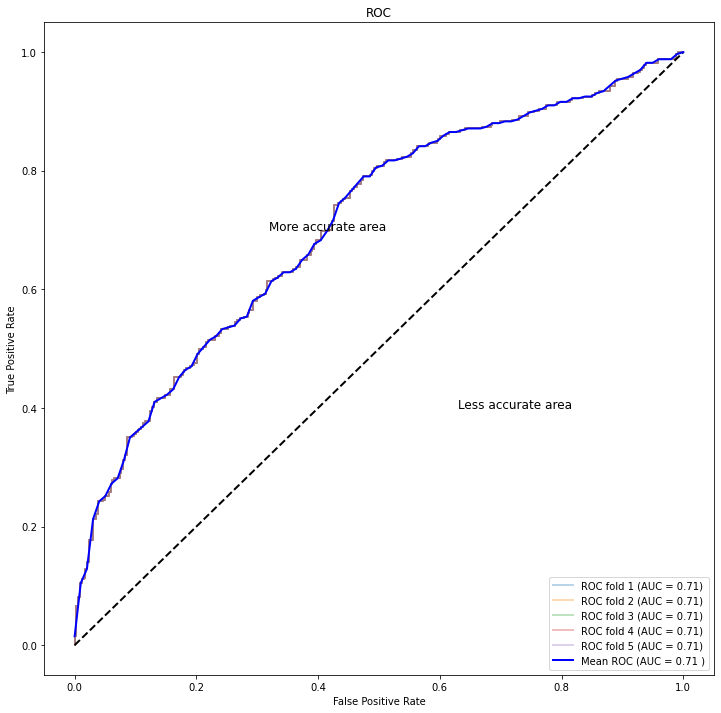

Train_accuracy: 63.99239543726236 

AUC: 0.7081443174257546 

Test_accuracy: 64.13690476190477


In [96]:
model_metrics(clf, X_train, X_test, y_train1, y_test)

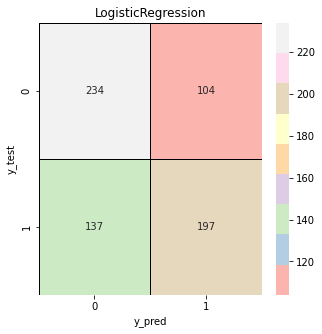

In [97]:
estimate_model(clf, X_train, X_test, y_train1, y_test)

#### Now we can compare the final model scores to the first logistic regression model scores: <br>                      
Train_accuracy: 82.93591654247392 <br>
AUC: 0.5936015938737766  <br>
Test_accuracy: 58.63095238095239

How we will classify an observation

In [98]:
#taking a row 
vector = df.iloc[24]
#taking only the features that our model takes into account
vector= vector[columns]
def pipeline(numpy_array, scaler_file, clf_file):
    numpy_array = numpy_array.values
    vector_df=pd.DataFrame([numpy_array], columns=columns)
    with open(scaler_file, 'rb') as f:
        scaler = pickle.load(f)
    vector_df= scaler.transform(vector_df)
    with open(clf_file, 'rb') as f:
        clf = pickle.load(f)
    return (clf.predict_proba(vector_df)[0][1])*100

In [99]:
# Chances this patient have pcos
print(f"There is {truncate(pipeline(vector,'scaler2.pkl' , 'model2.pkl'),2)}% chance this patient has pcos, true label is {y.iloc[24]}")

There is 39.66% chance this patient has pcos, true label is 0
